# DSC 550 Project Milestone #1

The problem being addressed in this project is if we can accurately predict who will buy travel insurance or not. If it is possible to predict what group of people are more inclined to buy travel insurance we can use customer specific advertising. This specific data set contains 10 columns ranging from education level to chronic diseases. The inspiration behind this project is that I work for the Charlotte Airport and every day I see thousands of potential customers for travel insurance. One thing that this data set is missing is the average payout/profit of travel insurance. It would be very interesting to see if a particular group of people are continually benefiting from travel insurance which could hurt profits. 

In [2]:
import pandas as pd
import numpy as np
import seaborn

In [3]:
#load netflix data
df = pd.read_csv('TravelInsurancePrediction.csv')

In [4]:
#Examine the Data
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [5]:
# Look at the shape of the data
df.shape

(1987, 10)

In [6]:
# import matplotlib for visulization
import matplotlib.pyplot as plt

In [7]:
# set the figure size
plt.rcParams['figure.figsize'] = (20, 10)

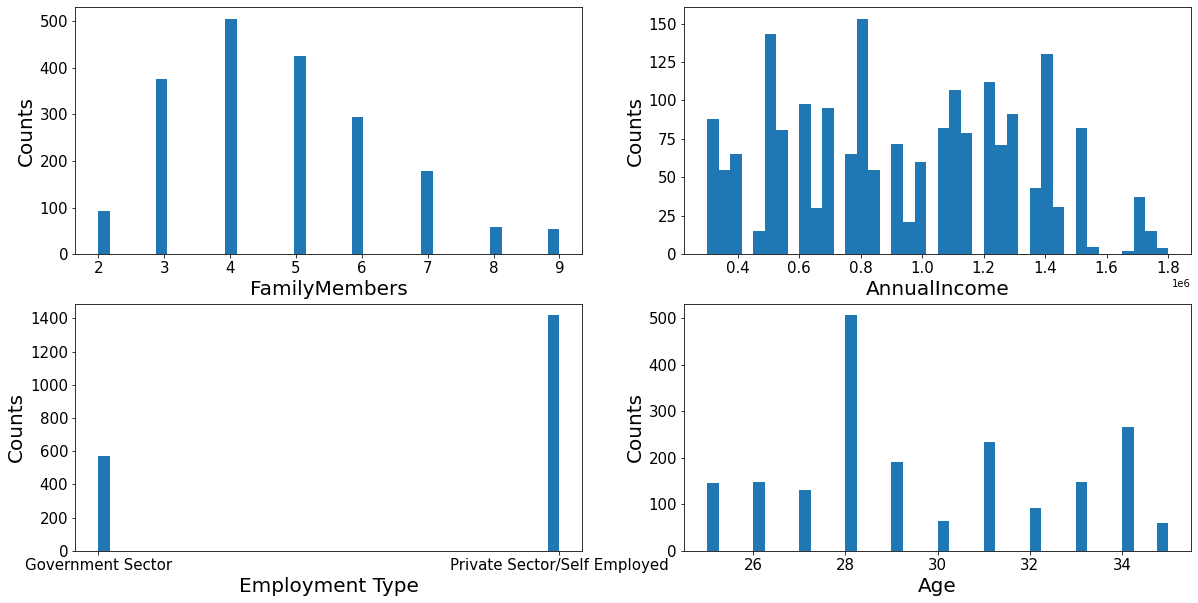

In [8]:
# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# set the features
num_features = ['FamilyMembers', 'AnnualIncome', 'Employment Type', 'Age']
xaxes = num_features
yaxes = ['Counts', 'Counts','Counts','Counts']

# Make histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
    
plt.show()


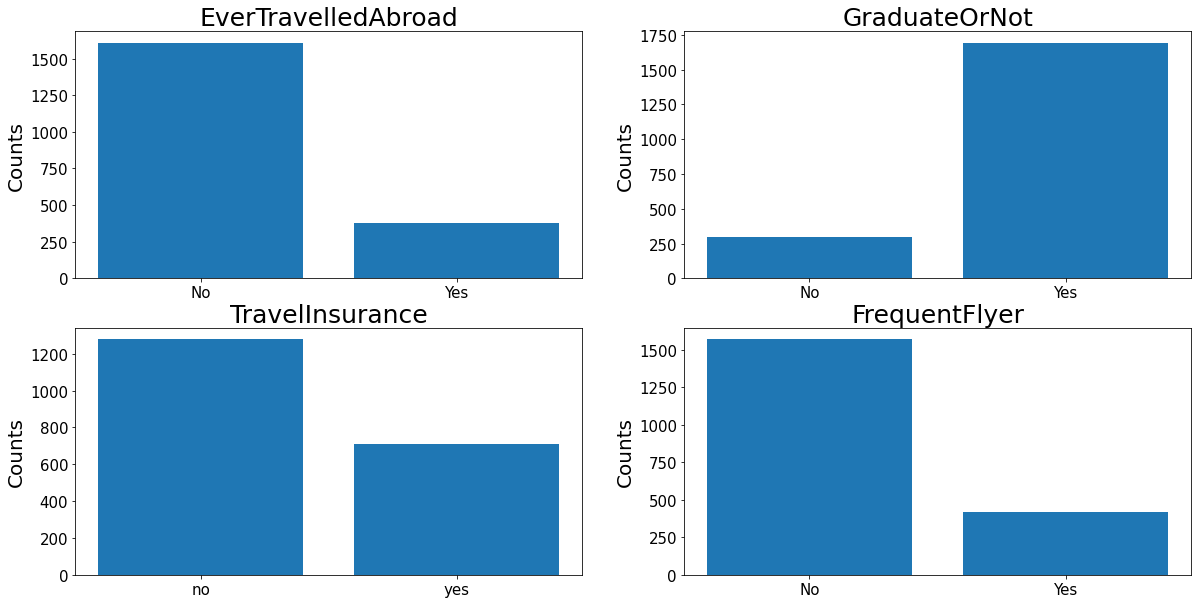

In [9]:
# Data to plot

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visulizer
X_Survived = df.replace({'EverTravelledAbroad': {1: 'yes', 0: 'no'}}).groupby('EverTravelledAbroad').size().reset_index(name='Counts')['EverTravelledAbroad']
Y_Survived = df.replace({'EverTravelledAbroad': {1: 'yes', 0: 'no'}}).groupby('EverTravelledAbroad').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 0].bar(X_Survived, Y_Survived)
axes[0, 0].set_title('EverTravelledAbroad', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Survived = df.replace({'GraduateOrNot': {1: 'yes', 0: 'no'}}).groupby('GraduateOrNot').size().reset_index(name='Counts')['GraduateOrNot']
Y_Survived = df.replace({'GraduateOrNot': {1: 'yes', 0: 'no'}}).groupby('GraduateOrNot').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 1].bar(X_Survived, Y_Survived)
axes[0, 1].set_title('GraduateOrNot', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Survived = df.replace({'FrequentFlyer': {1: 'yes', 0: 'no'}}).groupby('FrequentFlyer').size().reset_index(name='Counts')['FrequentFlyer']
Y_Survived = df.replace({'FrequentFlyer': {1: 'yes', 0: 'no'}}).groupby('FrequentFlyer').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 1].bar(X_Survived, Y_Survived)
axes[1, 1].set_title('FrequentFlyer', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Survived = df.replace({'TravelInsurance': {1: 'yes', 0: 'no'}}).groupby('TravelInsurance').size().reset_index(name='Counts')['TravelInsurance']
Y_Survived = df.replace({'TravelInsurance': {1: 'yes', 0: 'no'}}).groupby('TravelInsurance').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 0].bar(X_Survived, Y_Survived)
axes[1, 0].set_title('TravelInsurance', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)


plt.show()


In [10]:
# I want to see just how many variables make Age and annual income
variables = ['Age','AnnualIncome']

In [11]:
for v in variables:
    classes=df[v].unique()
    num_classes = df[v].nunique()
    print("There are {} classes in the \"{}\" column. They are: {}".
format(num_classes,v,classes))
  

There are 11 classes in the "Age" column. They are: [31 34 28 25 33 26 32 29 35 30 27]
There are 30 classes in the "AnnualIncome" column. They are: [ 400000 1250000  500000  700000 1150000 1300000 1350000 1450000  800000
 1400000  850000 1500000 1050000  350000 1100000  600000  900000  550000
  300000  750000 1200000 1000000  950000 1700000 1750000  650000  450000
 1650000 1800000 1550000]


In [12]:
#finding correlation 
corr = df.corr()
corr

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
Unnamed: 0,1.000000,-0.004917,-0.025031,-0.041506,-0.006858,0.006196
Age,-0.004917,1.000000,-0.020101,0.027409,0.007359,0.061060
AnnualIncome,-0.025031,-0.020101,1.000000,-0.015367,-0.001149,0.396763
FamilyMembers,-0.041506,0.027409,-0.015367,1.000000,0.028209,0.079909
ChronicDiseases,-0.006858,0.007359,-0.001149,0.028209,1.000000,0.018190
TravelInsurance,0.006196,0.061060,0.396763,0.079909,0.018190,1.000000


<AxesSubplot:>

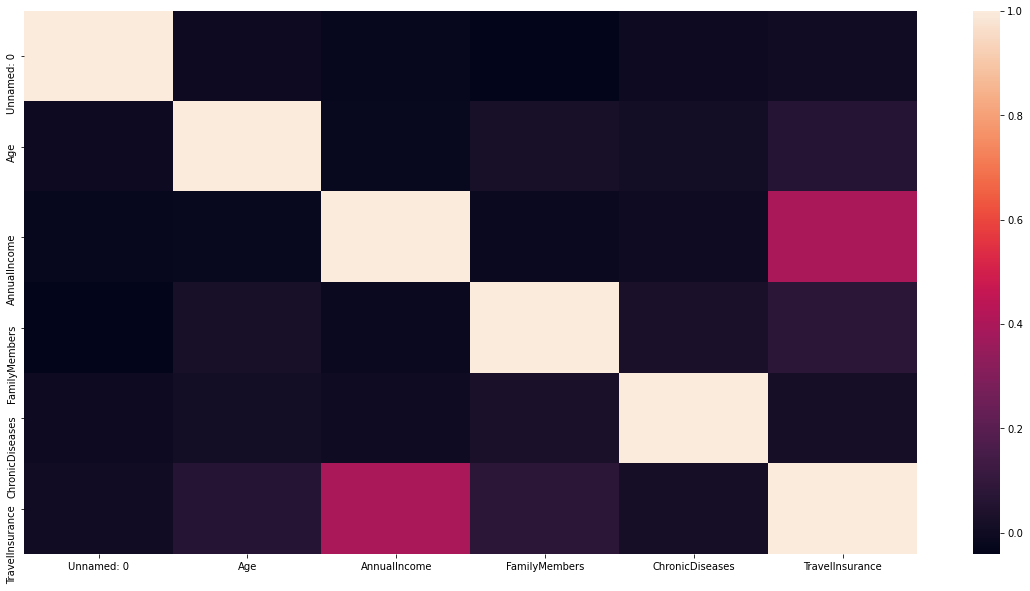

In [13]:
#Making a corelation chart
corr = df.corr()
seaborn.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values)

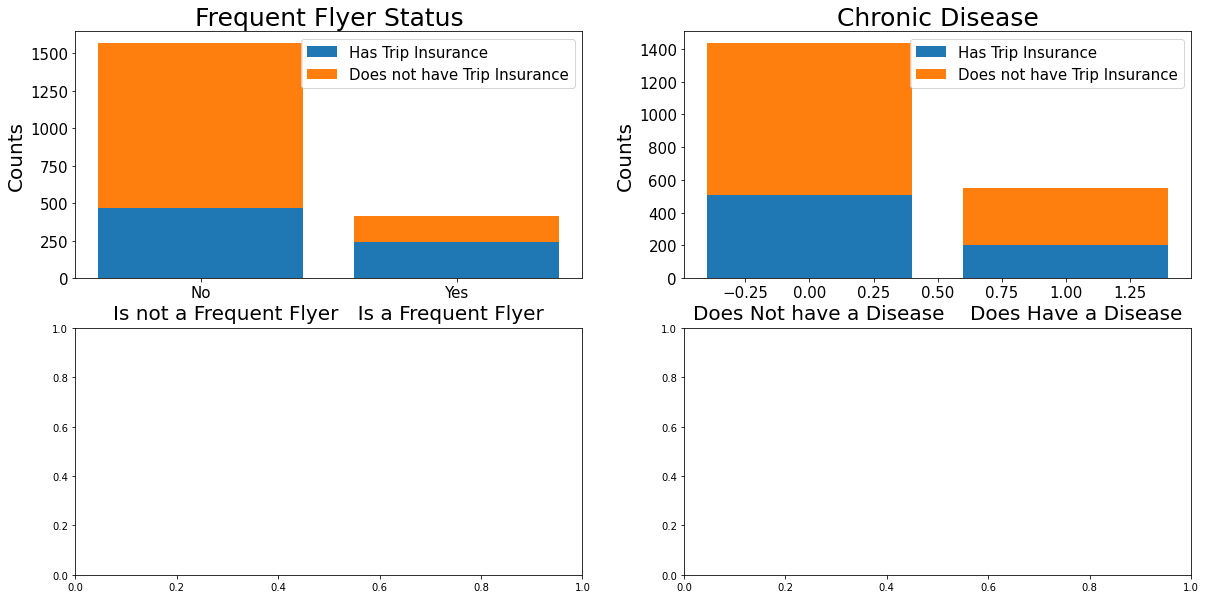

In [14]:
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols=2)

# make the data read to feed into the visulizer
frequentflyeryes = df.replace({'TravelInsurance': {1: 'Yes', 0: 'No'}})[df['TravelInsurance']==1]['FrequentFlyer'].value_counts()
frequentflyerno = df.replace({'TravelInsurance': {1: 'Yes', 0: 'No'}})[df['TravelInsurance']==0]['FrequentFlyer'].value_counts()
frequentflyerno = frequentflyerno.reindex(index = frequentflyeryes.index)
# make the bar plot
p1 = axes[0, 0].bar(frequentflyeryes.index, frequentflyeryes.values)
p2 = axes[0, 0].bar(frequentflyerno.index, frequentflyerno.values, bottom=frequentflyeryes.values)
axes[0, 0].set_title('Frequent Flyer Status', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].set_xlabel('Is not a Frequent Flyer   Is a Frequent Flyer', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('Has Trip Insurance', 'Does not have Trip Insurance'), fontsize = 15)

# make the data read to feed into the visulizer
HasChronicDiseases = df.replace({'TravelInsurance': {1: 'Yes', 0: 'No'}})[df['TravelInsurance']==1]['ChronicDiseases'].value_counts()
DoesntChronicDiseases = df.replace({'TravelInsurance': {1: 'Yes', 0: 'No'}})[df['TravelInsurance']==0]['ChronicDiseases'].value_counts()
DoesntChronicDiseases = DoesntChronicDiseases.reindex(index = HasChronicDiseases.index)
# make the bar plot
p1 = axes[0, 1].bar(HasChronicDiseases.index, HasChronicDiseases.values)
p2 = axes[0, 1].bar(DoesntChronicDiseases.index, DoesntChronicDiseases.values, bottom=HasChronicDiseases.values)
axes[0, 1].set_title('Chronic Disease', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].set_xlabel('Does Not have a Disease    Does Have a Disease', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p1[0], p2[0]), ('Has Trip Insurance', 'Does not have Trip Insurance'), fontsize = 15)


### Analysis

Just by looking at these graphs it appears our data set is full of individuals with varying incomes that work mostly in the private sector who dont usually buy tavel insurance. It does appear that frequent flyers do buy trip insurance more often than not. One concern that I currenlty have is the lack of correlation between variables. It does appear annual income and # of family members do play a role in if travel insurance is bought. This data set could also benefit from a wider age range. I did like how smoothly I was able to use the code from the titanic dataset to describe this data set. Some of these variables are not needed such as unnamed & ever travel abroad)  

# Part 2

### Goal

you should drop any features that are not useful for your model building. You should explain and justify why the feature dropped is not useful. You should address any missing data issues. Build any new features that you need for your model, e.g., create dummy variables for categorical features if necessary. Explain your process at each step. You can use any methods/tools you think are most appropriate. Again, keep in mind that this may look very different from what is done in the Titanic tutorial case study. You should do what makes sense for your project. Be careful to avoid data snooping in these steps.

In [15]:
# lets first check for any missing values
for c in df.columns:
    miss = df[c].isnull().sum()
    if miss >0:
        print("{} has {} missing values".format(c,miss))
    else:
        print("{} column has no missing values!".format(c))

Unnamed: 0 column has no missing values!
Age column has no missing values!
Employment Type column has no missing values!
GraduateOrNot column has no missing values!
AnnualIncome column has no missing values!
FamilyMembers column has no missing values!
ChronicDiseases column has no missing values!
FrequentFlyer column has no missing values!
EverTravelledAbroad column has no missing values!
TravelInsurance column has no missing values!


There are no missing values thankfully

In [16]:
# rename a couple columns to make them easier to call
df.rename(columns = {'GraduateOrNot':'Degree', 'EverTravelledAbroad':'Abroad'}, inplace=True)

In [17]:
df.head()

,Unnamed: 0,Age,Employment Type,Degree,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,Abroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


I would like to add more data to the age and annual income columns but sadly there is very little correlation between the two columns making me hesitant to make up data

In [18]:
# replace categorical data with 0 meaning no and 1 meaning yes
df["FrequentFlyer"] = df["FrequentFlyer"].astype('category')
df["FrequentFlyer_cat"] = df["FrequentFlyer"].cat.codes
df["Degree"] = df["Degree"].astype('category')
df["Degree_cat"] = df["Degree"].cat.codes
df["Abroad"] = df["Abroad"].astype('category')
df["Abroad_cat"] = df["Abroad"].cat.codes
df["Employment Type"] = df["Employment Type"].astype('category')
df["Employment Type_cat"] = df["Employment Type"].cat.codes
df.head()

          


,Unnamed: 0,Age,Employment Type,Degree,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,Abroad,TravelInsurance,FrequentFlyer_cat,Degree_cat,Abroad_cat,Employment Type_cat
0,0,31,Government Sector,Yes,400000,6,1,No,No,0,0,1,0,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0,0,1,0,1
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1,0,1,0,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0,0,1,0,1
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0,1,1,0,1


Now I will re run my Correlation Chart with this new data to see if there is any new insights

<AxesSubplot:>

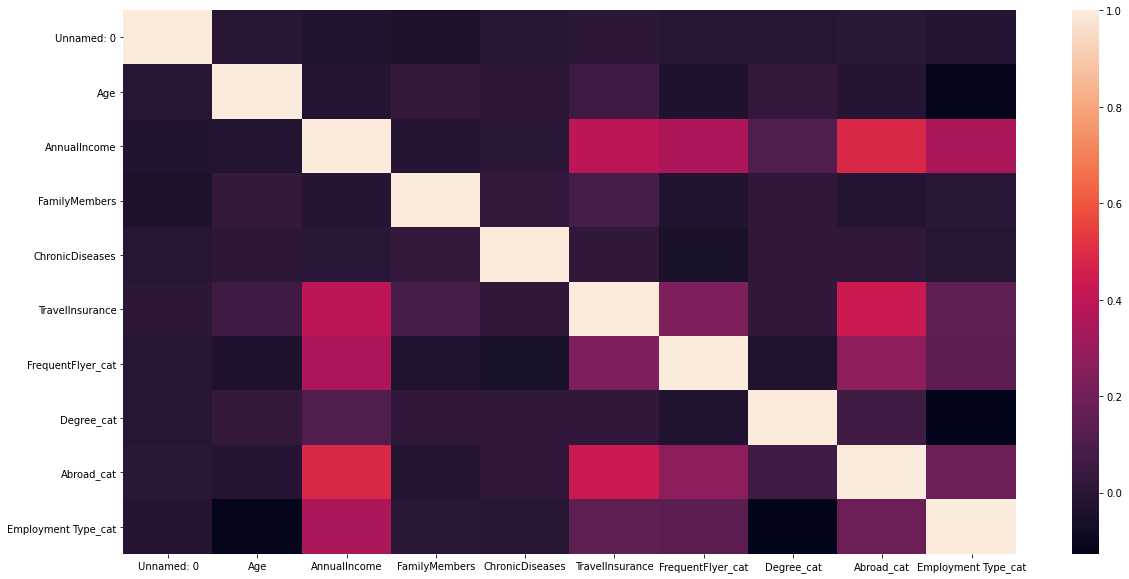

In [19]:
#Making a corelation chart
corr = df.corr()
seaborn.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values)

In [20]:
#finding correlation 
corr = df.corr()
corr

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance,FrequentFlyer_cat,Degree_cat,Abroad_cat,Employment Type_cat
Unnamed: 0,1.000000,-0.004917,-0.025031,-0.041506,-0.006858,0.006196,-0.004596,-0.008602,-0.002160,-0.015769
Age,-0.004917,1.000000,-0.020101,0.027409,0.007359,0.061060,-0.033159,0.027125,-0.012779,-0.115134
AnnualIncome,-0.025031,-0.020101,1.000000,-0.015367,-0.001149,0.396763,0.353087,0.108066,0.486043,0.349157
FamilyMembers,-0.041506,0.027409,-0.015367,1.000000,0.028209,0.079909,-0.023775,0.021201,-0.020755,-0.003354
ChronicDiseases,-0.006858,0.007359,-0.001149,0.028209,1.000000,0.018190,-0.043720,0.018811,0.021238,-0.011553
TravelInsurance,0.006196,0.061060,0.396763,0.079909,0.018190,1.000000,0.232103,0.018934,0.433183,0.147847
FrequentFlyer_cat,-0.004596,-0.033159,0.353087,-0.023775,-0.043720,0.232103,1.000000,-0.028120,0.277334,0.143790
Degree_cat,-0.008602,0.027125,0.108066,0.021201,0.018811,0.018934,-0.028120,1.000000,0.062683,-0.127133
Abroad_cat,-0.002160,-0.012779,0.486043,-0.020755,0.021238,0.433183,0.277334,0.062683,1.000000,0.181098
Employment Type_cat,-0.015769,-0.115134,0.349157,-0.003354,-0.011553,0.147847,0.143790,-0.127133,0.181098,1.000000


This is very promising it shows that there is correlation between travelling abroad and the purchase of travel insurance as well.

In [21]:
# I am now going to remove some un wanted columns such as 'degree' (very low correlation) and my cat data
df1 = df [['Age','AnnualIncome','FamilyMembers','ChronicDiseases','TravelInsurance','FrequentFlyer_cat','Abroad_cat','Employment Type_cat']]

In [22]:
df1

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance,FrequentFlyer_cat,Abroad_cat,Employment Type_cat
0,31,400000,6,1,0,0,0,0
1,31,1250000,7,0,0,0,0,1
2,34,500000,4,1,1,0,0,1
3,28,700000,3,1,0,0,0,1
4,28,700000,8,1,0,1,0,1
...,...,...,...,...,...,...,...,...
1982,33,1500000,4,0,1,1,1,1
1983,28,1750000,5,1,0,0,1,1
1984,28,1150000,6,1,0,0,0,1
1985,34,1000000,6,0,1,1,1,1


# Milestone 3

In [23]:
#Step 14 - create a whole features dataset that can be used for train and validation data splitting
# here we will combine the numerical features and the dummie features together
features_model = ['ChronicDiseases', 'FrequentFlyer_cat', 'Abroad_cat', 'Employment Type_cat', 'FamilyMembers','AnnualIncome']
data_model_X = pd.concat([df1[features_model], df1], axis=1)

# create a whole target dataset that can be used for train and validation data splitting
data_model_y = df1['TravelInsurance']
# separate data into training and validation and check the details of the datasets
# import packages
from sklearn.model_selection import train_test_split

# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=11)

# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

# Survived and not-survived
print('\n')
print('No. of people who bought travel insurance in train set:')
print(y_train.value_counts())

print('\n')
print('No. of people who bought travel insurance in validation set:')
print(y_val.value_counts())


No. of samples in training set:  1390
No. of samples in validation set: 597


No. of people who bought travel insurance in train set:
0    894
1    496
Name: TravelInsurance, dtype: int64


No. of people who bought travel insurance in validation set:
0    383
1    214
Name: TravelInsurance, dtype: int64


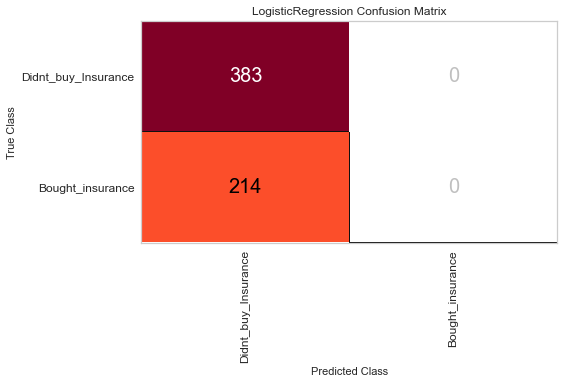

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [24]:
# Step 15 - Eval Metrics
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model 
model = LogisticRegression()

#The ConfusionMatrix visualizer taxes a model
classes = ['Didnt_buy_Insurance','Bought_insurance']
cm = ConfusionMatrix(model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()


C:\Users\Daffy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


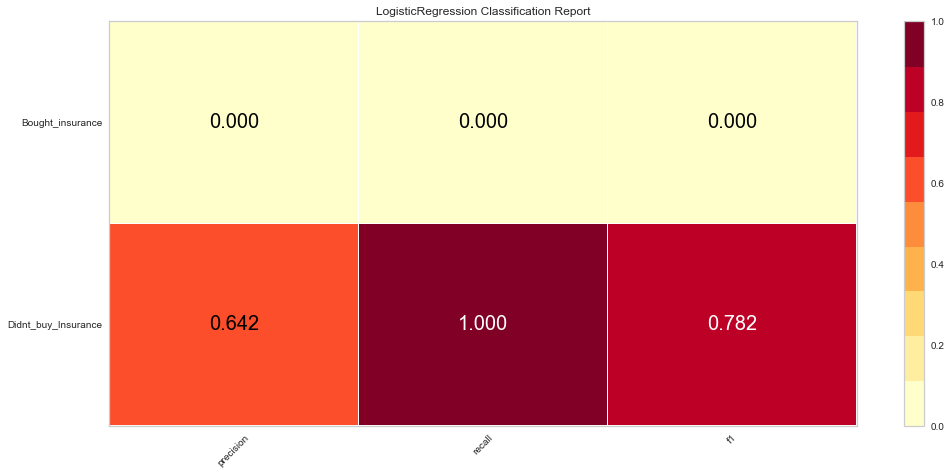

In [25]:
# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

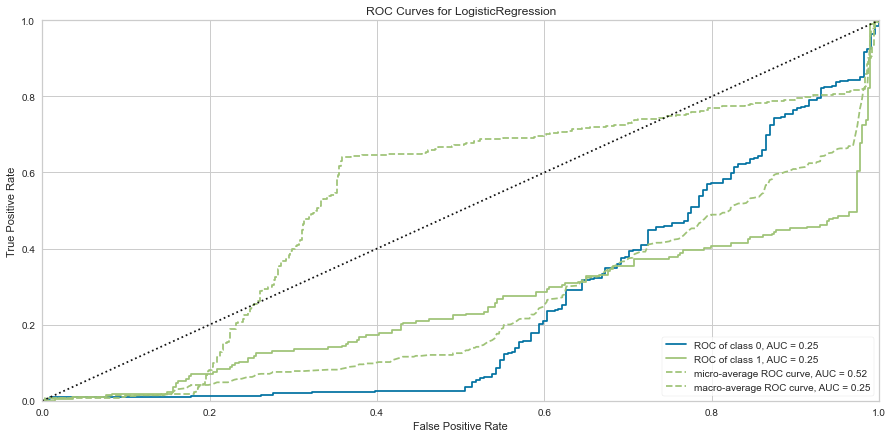

In [26]:
# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

My first attempt at a model did not go well. I tried to mimick the titanic lesson because both projects are binary classification so I assumed it would transfer over well. The accuracy was alright for predicting if people would not buy insurance but I was unable to get it to work the other way around. 

# Part 4

In [27]:
#Trying a Decision Tree Classifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz 
from IPython.display import Image  
import pydotplus
from six import StringIO

In [47]:
#split the data
feature_cols = ['Age','AnnualIncome','FamilyMembers','ChronicDiseases','FrequentFlyer_cat','Abroad_cat','Employment Type_cat']

X = df1[feature_cols]
y = df1.TravelInsurance

In [29]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [30]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train
clf = clf.fit(X_train,y_train)

#Predict
y_pred = clf.predict(X_test)

In [31]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7554438860971524


An accuracy of 75 percent is a small win for me! I am now going to try to tune this a little more

In [32]:
#maximum depth of the tree was controlled here!

# Create object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree
clf = clf.fit(X_train,y_train)

#Predict the response
y_pred = clf.predict(X_test)

# Model Accuracy,
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8391959798994975


In [33]:
#get the f1, percision and accurcacy scores 
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import classification_report
print(f"f1 scores: {metrics}")
predicted = clf.predict(X_test)
print("Accuracy: ", np.mean(predicted == y_test))

print("Confusion Matrix:\n", confusion_matrix(y_test, predicted))
print("Classification Report:\n", classification_report(y_test,predicted))
print("Accuracy: ", accuracy_score(y_test,predicted))

f1 scores: <module 'sklearn.metrics' from 'C:\\Users\\Daffy\\anaconda3\\lib\\site-packages\\sklearn\\metrics\\__init__.py'>
Accuracy:  0.8391959798994975
Confusion Matrix:
 [[377   6]
 [ 90 124]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.98      0.89       383
           1       0.95      0.58      0.72       214

    accuracy                           0.84       597
   macro avg       0.88      0.78      0.80       597
weighted avg       0.86      0.84      0.83       597

Accuracy:  0.8391959798994975


We were able to imporve our accuracy by almost 10 percent! 

I am very happy with the results for my decision tree. The main reason why i picked this model is because it I am working with a binary classification. Travelers either buy insurance or they do not. One thing that I could imporve on is the visualization of the tree. I was not able to get it work.

In [38]:
#attempting a random forest
import numpy as np
import sklearn as sk
import sklearn.datasets as skd
import sklearn.ensemble as ske
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
#create model
reg = ske.RandomForestRegressor()

In [40]:
#fit model
reg.fit(X, y)

RandomForestRegressor()

In [41]:
fet_ind = np.argsort(reg.feature_importances_)[::-1]
fet_imp = reg.feature_importances_[fet_ind]

In [ ]:
from sklearn import tree
tree.export_graphviz(reg.estimators_[0],
                     'tree.dot')